<b><font color="SteelBlue" size="+3">Anticipez les besoins en consommation de bâtiments 2</font></b>

Ce notebook est la suite du notebook d'exploration des données Deveau_Estelle_1_notebook_exploratoire_022024

# Introduction

## Imports

In [1]:
# Chargement des librairies
# Builtin
import os

# Data
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate
import time

# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

## Data

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'data',
 'Deveau_Estelle_1_notebook_exploratoire_022024.ipynb',
 'Deveau_Estelle_2_notebook_prediction_EnergyUse_022024.ipynb',
 'Map_of_Seattle,_divided_by_districts.png',
 'svg']

In [3]:
os.listdir("data/cleaned/")

['df_cleaned.csv']

In [4]:
path     = "./data/cleaned/"
filename = "df_cleaned.csv"

In [5]:
df = pd.read_csv(path + filename)
df.head()

,TotalGHGEmissions,SiteEnergyUseWN(kBtu),Log_TotalGHGEmissions,Log_SiteEnergyUseWN,NumberofBuildings,NumberofFloors,BuildingType,NumberOfPropertyUseTypes,PropertyGFATotal,LargestPropertyUseTypeGFA_pct,...,PropertyGFAParking_pct,BuildingAge,GroupedNeighborhood,GroupedLargType,GroupedSecondLargType,GroupedThirdLargType,SteamUse_pct,Electricity_pct,NaturalGas_pct,ENERGYSTARScore
0,249.98,7456910.0,5.521381,15.824652,1.0,12,NonResidential,1,88434,100.000000,...,0.000000,89,commercial_industrial,D - Résidences,X - Non classifie,X - Non classifie,26.872820,52.917723,17.117720,60.0
1,295.86,8664479.0,5.689886,15.974742,1.0,11,NonResidential,3,103566,80.991831,...,14.545314,20,commercial_industrial,D - Résidences,C - Commerce resto loisirs,X - Non classifie,0.000000,37.426959,59.381320,61.0
2,2089.28,73937112.0,7.644575,18.118725,1.0,41,NonResidential,1,956110,79.362597,...,20.637403,47,commercial_industrial,D - Résidences,X - Non classifie,X - Non classifie,29.168781,66.984851,2.020366,43.0
3,286.43,6946800.5,5.657494,15.753792,1.0,10,NonResidential,1,61320,100.000000,...,0.000000,90,commercial_industrial,D - Résidences,X - Non classifie,X - Non classifie,31.877211,39.858983,26.072621,56.0
4,176.14,6062767.5,5.171279,15.617677,1.0,11,NonResidential,1,83008,100.000000,...,0.000000,90,commercial_industrial,D - Résidences,X - Non classifie,X - Non classifie,0.000000,46.368511,48.617731,27.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   TotalGHGEmissions                    1109 non-null   float64
 1   SiteEnergyUseWN(kBtu)                1109 non-null   float64
 2   Log_TotalGHGEmissions                1109 non-null   float64
 3   Log_SiteEnergyUseWN                  1109 non-null   float64
 4   NumberofBuildings                    1109 non-null   float64
 5   NumberofFloors                       1109 non-null   int64  
 6   BuildingType                         1109 non-null   object 
 7   NumberOfPropertyUseTypes             1109 non-null   int64  
 8   PropertyGFATotal                     1109 non-null   int64  
 9   LargestPropertyUseTypeGFA_pct        1109 non-null   float64
 10  SecondLargestPropertyUseTypeGFA_pct  1109 non-null   float64
 11  ThirdLargestPropertyUseTypeGFA

In [7]:
df.describe()

,TotalGHGEmissions,SiteEnergyUseWN(kBtu),Log_TotalGHGEmissions,Log_SiteEnergyUseWN,NumberofBuildings,NumberofFloors,NumberOfPropertyUseTypes,PropertyGFATotal,LargestPropertyUseTypeGFA_pct,SecondLargestPropertyUseTypeGFA_pct,ThirdLargestPropertyUseTypeGFA_pct,PropertyGFAParking_pct,BuildingAge,SteamUse_pct,Electricity_pct,NaturalGas_pct,ENERGYSTARScore
count,1109.000000,1.109000e+03,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1.109000e+03,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,701.000000
mean,169.832362,8.178016e+06,3.877767,14.856429,1.253381,4.032462,1.833183,1.109784e+05,88.746042,8.113658,1.502393,1.637907,58.504959,2.057110,65.397990,27.272598,63.078459
std,644.438367,3.223506e+07,1.515763,1.291348,3.555618,6.829858,1.182048,3.417603e+05,16.889800,13.748904,4.954547,5.154676,31.555596,8.655708,27.444465,24.483969,28.737250
min,0.400000,5.811420e+04,-0.916291,10.970165,1.000000,1.000000,1.000000,1.128500e+04,33.333333,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,18.810000,1.186733e+06,2.934389,13.986715,1.000000,1.000000,1.000000,2.708500e+04,80.896925,0.000000,0.000000,0.000000,35.000000,0.000000,43.086418,0.000000,43.000000
50%,46.450000,2.394062e+06,3.838376,14.688502,1.000000,2.000000,1.000000,4.339000e+04,100.000000,0.000000,0.000000,0.000000,55.000000,0.000000,64.341640,26.074393,70.000000
75%,132.710000,6.211750e+06,4.888166,15.641953,1.000000,4.000000,2.000000,8.726200e+04,100.000000,12.663707,0.000000,0.000000,88.000000,0.000000,94.824479,47.645524,88.000000
max,12307.160000,8.739237e+08,9.417936,20.588504,111.000000,76.000000,11.000000,9.320156e+06,100.000000,50.000000,33.333333,27.637240,116.000000,64.773098,103.872233,100.000000,100.000000


Nous allons commencer par chercher un modèle de ML pour prédire le SiteEnergyUseWN

Dans un premier temps, nous allons travailler en excluant l'ENERGYSTARScore puis nous ferons une comparaison avec son utilisation.

# Modelisation sans l'Energy Star Score

## Data preparation

### Vérification des fréquences

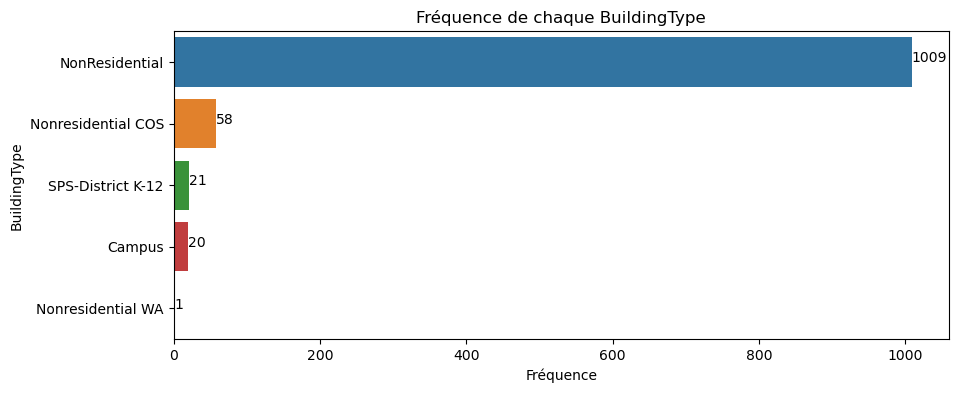

In [8]:
# Compter le nombre d'occurrences pour chaque BuildingType
group_counts = df['BuildingType'].value_counts().reset_index()
group_counts.columns = ['BuildingType', 'Counts']

plt.figure(figsize=(10, 4))

# Créer un graphique à barres
barplot  =  sns.barplot(y='BuildingType', x='Counts', data=group_counts, hue='BuildingType', palette='tab10', legend=False)

# Ajouter des étiquettes de texte pour chaque barre
for index, row in group_counts.iterrows():
    barplot.text(row['Counts'], index, row['Counts'], color='black', ha="left")
    
# Ajouter des titres et des labels
plt.title('Fréquence de chaque BuildingType')
plt.xlabel('Fréquence')
plt.ylabel('BuildingType')

plt.show()

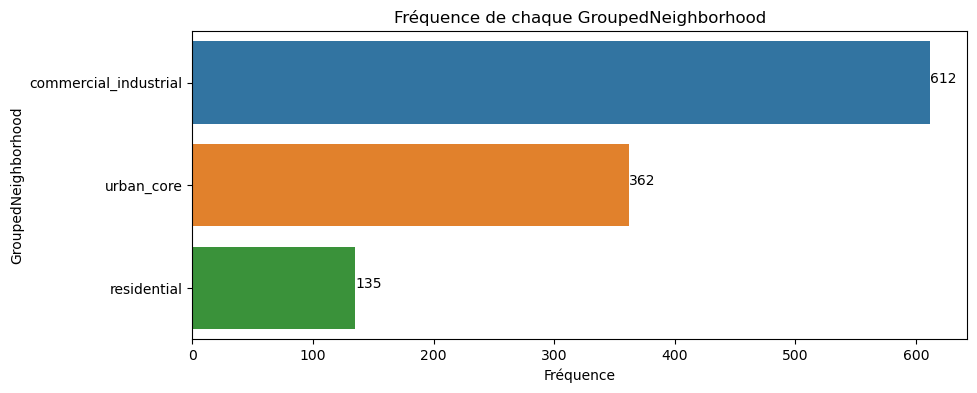

In [9]:
# Compter le nombre d'occurrences pour chaque GroupedNeighborhood
group_counts = df['GroupedNeighborhood'].value_counts().reset_index()
group_counts.columns = ['GroupedNeighborhood', 'Counts']

plt.figure(figsize=(10, 4))

# Créer un graphique à barres
barplot  =  sns.barplot(y='GroupedNeighborhood', x='Counts', data=group_counts, hue='GroupedNeighborhood', palette='tab10', legend=False)

# Ajouter des étiquettes de texte pour chaque barre
for index, row in group_counts.iterrows():
    barplot.text(row['Counts'], index, row['Counts'], color='black', ha="left")
    
# Ajouter des titres et des labels
plt.title('Fréquence de chaque GroupedNeighborhood')
plt.xlabel('Fréquence')
plt.ylabel('GroupedNeighborhood')

plt.show()

In [10]:
# Définir un dictionnaire de couleurs pour chaque catégorie
colors = {'A - Data Center Sante': '#d62728', 'B - Public et culturel': '#e377c2', 'C - Commerce resto loisirs': '#2ca02c', 
          'D - Résidences': '#1f77b4', 'E - Industrie et entrepots': '#9467bd', 'F - Bureaux et services': '#ff7f0e', 
          'G - Autres': 'grey', 'X - Non classifie': 'black'}

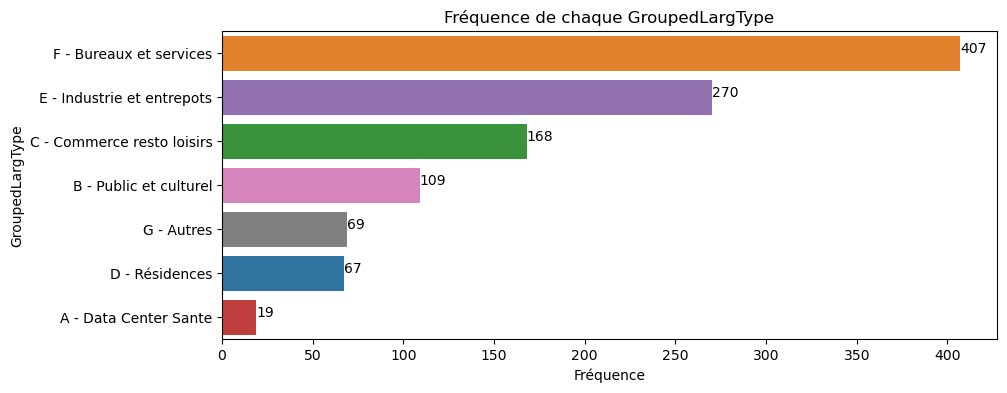

In [11]:
# Compter le nombre d'occurrences pour chaque GroupedLargType
group_counts = df['GroupedLargType'].value_counts().reset_index()
group_counts.columns = ['GroupedLargType', 'Counts']

plt.figure(figsize=(10, 4))

# Créer un graphique à barres
barplot  =  sns.barplot(y='GroupedLargType', x='Counts', data=group_counts, hue='GroupedLargType', palette=colors, legend=False)

# Ajouter des étiquettes de texte pour chaque barre
for index, row in group_counts.iterrows():
    barplot.text(row['Counts'], index, row['Counts'], color='black', ha="left")
    
# Ajouter des titres et des labels
plt.title('Fréquence de chaque GroupedLargType')
plt.xlabel('Fréquence')
plt.ylabel('GroupedLargType')

plt.show()

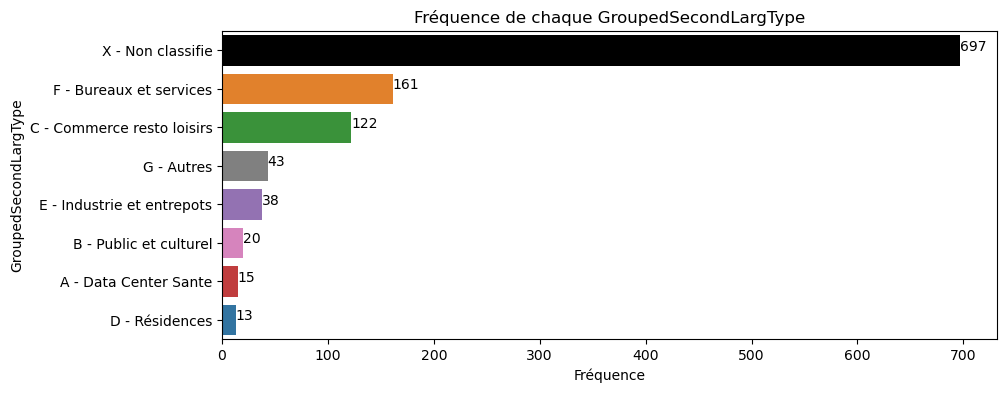

In [12]:
# Compter le nombre d'occurrences pour chaque GroupedSecondLargType
group_counts = df['GroupedSecondLargType'].value_counts().reset_index()
group_counts.columns = ['GroupedSecondLargType', 'Counts']

plt.figure(figsize=(10, 4))

# Créer un graphique à barres
barplot  = sns.barplot(y='GroupedSecondLargType', x='Counts', data=group_counts, hue='GroupedSecondLargType', palette=colors, legend=False)

# Ajouter des étiquettes de texte pour chaque barre
for index, row in group_counts.iterrows():
    barplot.text(row['Counts'], index, row['Counts'], color='black', ha="left")

plt.title('Fréquence de chaque GroupedSecondLargType')
plt.xlabel('Fréquence')
plt.ylabel('GroupedSecondLargType')
plt.show()

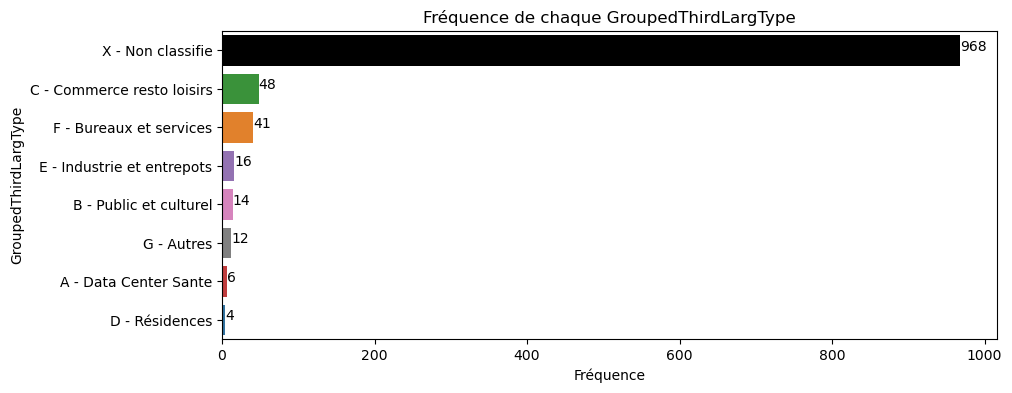

In [13]:
# Compter le nombre d'occurrences pour chaque GroupedThirdLargType
group_counts = df['GroupedThirdLargType'].value_counts().reset_index()
group_counts.columns = ['GroupedThirdLargType', 'Counts']

plt.figure(figsize=(10, 4))

# Créer un graphique à barres
barplot  = sns.barplot(y='GroupedThirdLargType', x='Counts', data=group_counts, hue='GroupedThirdLargType', palette=colors, legend=False)

# Ajouter des étiquettes de texte pour chaque barre
for index, row in group_counts.iterrows():
    barplot.text(row['Counts'], index, row['Counts'], color='black', ha="left")

plt.title('Fréquence de chaque GroupedThirdLargType')
plt.xlabel('Fréquence')
plt.ylabel('GroupedThirdLargType')
plt.show()

### Encodage one-hot

On supprime les colonnes GroupedThirdLargType et GroupedSecondLargType car trop peu d'informations. <br>
On supprime également NaturalGas_pct et ThirdLargestPropertyUseTypeGFA_pct car déductibles des autres features.

In [14]:
# Sélection des variables explicatives et des variables cibles
features = df.drop(['Log_TotalGHGEmissions', 'Log_SiteEnergyUseWN', 'TotalGHGEmissions', 'SiteEnergyUseWN(kBtu)', 'ENERGYSTARScore',
                   'NaturalGas_pct','GroupedThirdLargType', 'ThirdLargestPropertyUseTypeGFA_pct', 'GroupedSecondLargType'], axis=1)
target = df['Log_SiteEnergyUseWN']

# Transformation des variables catégorielles en variables numériques (encodage one-hot)
features = pd.get_dummies(features)

In [15]:
features.head(1)

,NumberofBuildings,NumberofFloors,NumberOfPropertyUseTypes,PropertyGFATotal,LargestPropertyUseTypeGFA_pct,SecondLargestPropertyUseTypeGFA_pct,PropertyGFAParking_pct,BuildingAge,SteamUse_pct,Electricity_pct,...,GroupedNeighborhood_commercial_industrial,GroupedNeighborhood_residential,GroupedNeighborhood_urban_core,GroupedLargType_A - Data Center Sante,GroupedLargType_B - Public et culturel,GroupedLargType_C - Commerce resto loisirs,GroupedLargType_D - Résidences,GroupedLargType_E - Industrie et entrepots,GroupedLargType_F - Bureaux et services,GroupedLargType_G - Autres
0,1.0,12,1,88434,100.0,0.0,0.0,89,26.87282,52.917723,...,True,False,False,False,False,False,True,False,False,False


In [16]:
# Supprimer une colonne par catégorie pour limiter les corrélations
features.drop(columns=['BuildingType_Nonresidential WA', 'GroupedNeighborhood_residential', 
                       'GroupedLargType_G - Autres'], inplace=True)

### Séparation des données

In [17]:
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
# Conservez les noms des colonnes dans une variable avant la mise à l'échelle
column_names = X_train.columns

# Affichage des dimensions des ensembles d'entraînement et de test
X_train.shape, X_test.shape

((887, 22), (222, 22))

In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 887 entries, 616 to 860
Data columns (total 22 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   NumberofBuildings                           887 non-null    float64
 1   NumberofFloors                              887 non-null    int64  
 2   NumberOfPropertyUseTypes                    887 non-null    int64  
 3   PropertyGFATotal                            887 non-null    int64  
 4   LargestPropertyUseTypeGFA_pct               887 non-null    float64
 5   SecondLargestPropertyUseTypeGFA_pct         887 non-null    float64
 6   PropertyGFAParking_pct                      887 non-null    float64
 7   BuildingAge                                 887 non-null    int64  
 8   SteamUse_pct                                887 non-null    float64
 9   Electricity_pct                             887 non-null    float64
 10  BuildingType_Camp

In [19]:
X_train.head()

,NumberofBuildings,NumberofFloors,NumberOfPropertyUseTypes,PropertyGFATotal,LargestPropertyUseTypeGFA_pct,SecondLargestPropertyUseTypeGFA_pct,PropertyGFAParking_pct,BuildingAge,SteamUse_pct,Electricity_pct,...,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,GroupedNeighborhood_commercial_industrial,GroupedNeighborhood_urban_core,GroupedLargType_A - Data Center Sante,GroupedLargType_B - Public et culturel,GroupedLargType_C - Commerce resto loisirs,GroupedLargType_D - Résidences,GroupedLargType_E - Industrie et entrepots,GroupedLargType_F - Bureaux et services
616,1.0,1,2,21101,87.071703,12.928297,0.0,27,0.0,20.953928,...,False,False,True,False,False,False,False,False,True,False
990,1.0,1,3,35017,65.908258,34.091742,0.0,47,0.0,64.880959,...,False,False,True,False,False,False,False,False,False,True
706,1.0,2,3,20088,82.124617,17.875383,0.0,37,0.0,96.812758,...,False,False,False,True,False,False,True,False,False,False
777,1.0,1,1,25880,100.000000,0.000000,0.0,72,0.0,100.000000,...,False,False,True,False,False,False,True,False,False,False
732,1.0,1,1,23706,100.000000,0.000000,0.0,53,0.0,38.746013,...,False,False,True,False,False,False,False,False,False,True


In [20]:
y_train.head()

616    13.616441
990    14.147898
706    12.729428
777    12.001260
732    13.031307
Name: Log_SiteEnergyUseWN, dtype: float64

### Standardisation

In [21]:
# Initialisation du StandardScaler
scaler = StandardScaler()

In [22]:
columns_to_scale=['NumberofBuildings','NumberofFloors',	'NumberOfPropertyUseTypes', 'PropertyGFATotal', 'LargestPropertyUseTypeGFA_pct', 
                  'SecondLargestPropertyUseTypeGFA_pct', 'BuildingAge', 'SteamUse_pct', 'Electricity_pct']
# 'ThirdLargestPropertyUseTypeGFA_pct' , 'NaturalGas_pct'

In [23]:
# Séparer les colonnes à normaliser
X_train_to_scale = X_train[columns_to_scale]
X_test_to_scale = X_test[columns_to_scale]

# Appliquer la normalisation sur ces colonnes
X_train_scaled = scaler.fit_transform(X_train_to_scale)
X_test_scaled = scaler.transform(X_test_to_scale)

# Merge
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=columns_to_scale, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=columns_to_scale, index=X_test.index)
X_train_final = X_train.drop(columns=columns_to_scale).join(X_train_scaled_df)
X_test_final = X_test.drop(columns=columns_to_scale).join(X_test_scaled_df)


In [24]:
X_train_final.head()

,PropertyGFAParking_pct,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,GroupedNeighborhood_commercial_industrial,GroupedNeighborhood_urban_core,GroupedLargType_A - Data Center Sante,GroupedLargType_B - Public et culturel,GroupedLargType_C - Commerce resto loisirs,...,GroupedLargType_F - Bureaux et services,NumberofBuildings,NumberofFloors,NumberOfPropertyUseTypes,PropertyGFATotal,LargestPropertyUseTypeGFA_pct,SecondLargestPropertyUseTypeGFA_pct,BuildingAge,SteamUse_pct,Electricity_pct
616,0.0,False,True,False,False,True,False,False,False,False,...,False,-0.071607,-0.456079,0.151962,-0.239709,-0.095229,0.335021,-1.001254,-0.252329,-1.603876
990,0.0,False,True,False,False,True,False,False,False,False,...,True,-0.071607,-0.456079,1.038743,-0.201472,-1.339196,1.859290,-0.358114,-0.252329,-0.014706
706,0.0,False,True,False,False,False,True,False,False,True,...,False,-0.071607,-0.293351,1.038743,-0.242493,-0.386014,0.691329,-0.679684,-0.252329,1.140506
777,0.0,False,True,False,False,True,False,False,False,True,...,False,-0.071607,-0.456079,-0.734819,-0.226578,0.664684,-0.596122,0.445812,-0.252329,1.255812
732,0.0,False,True,False,False,True,False,False,False,False,...,True,-0.071607,-0.456079,-0.734819,-0.232552,0.664684,-0.596122,-0.165172,-0.252329,-0.960203


## Préparation des métriques

## Tests de modèles

In [25]:
# Liste de modèles à évaluer
models = [
    ('DummyRegressorMedian', DummyRegressor(strategy='median')),
    ('LinearRegression', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('ElasticNet', ElasticNet(random_state=0)),
    ('RandomForest', RandomForestRegressor(random_state=0)),
    ('GradientBoostingReg', GradientBoostingRegressor(random_state=0)),
    ('SVR', SVR())
]

# Tableau pour collecter les résultats
results = []

# Évaluer chaque modèle
for name, model in models:
    # Entraîner le modèle
    start_time = time.time() 
    model.fit(X_train_final, y_train)
    end_time = time.time()  # Enregistre le temps de fin
    duration = end_time - start_time  # Calcule la durée
    
    # Prédire sur l'ensemble de test
    y_pred = model.predict(X_test_final)
    
    # Calculer les métriques
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # RMSE CV
    scores_rmse = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_cv = np.sqrt(-scores_rmse).mean()
    
    # R2 CV
    scores_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    r2_cv = scores_r2.mean()
    r2_cv_std = scores_r2.std() 
    
    results.append((name, rmse, mae, r2, rmse_cv, r2_cv, r2_cv_std, duration))


In [26]:
# Convertir les résultats en DataFrame
df_results = pd.DataFrame(results, columns=['Modèle', 'RMSE', 'MAE', 'R2', 'RMSE CV', 'R2 CV', 'R2 CV Std', 'Temps de calcul'])
df_sorted_by_performance = df_results.sort_values(by=['RMSE', 'R2 CV', 'MAE'], ascending=[True, False, True])

df_sorted_by_performance

,Modèle,RMSE,MAE,R2,RMSE CV,R2 CV,R2 CV Std,Temps de calcul
5,RandomForest,0.609963,0.459115,0.765125,0.707794,0.698185,0.028238,0.593506
6,GradientBoostingReg,0.616699,0.470094,0.759908,0.684752,0.718479,0.016838,0.175493
7,SVR,0.806225,0.622275,0.589660,0.865213,0.550612,0.025830,0.028020
2,Ridge,0.909190,0.700410,0.478156,1.281969,-0.156739,1.257323,0.002001
1,LinearRegression,0.910616,0.701622,0.476518,1.283851,-0.160125,1.261306,0.005760
4,ElasticNet,1.183614,0.933498,0.115595,1.295836,-0.076779,0.812050,0.000503
3,Lasso,1.210077,0.949629,0.075605,1.334502,-0.158022,0.944418,0.001001
0,DummyRegressorMedian,1.278830,0.981936,-0.032422,1.307694,-0.021854,0.016661,0.000000


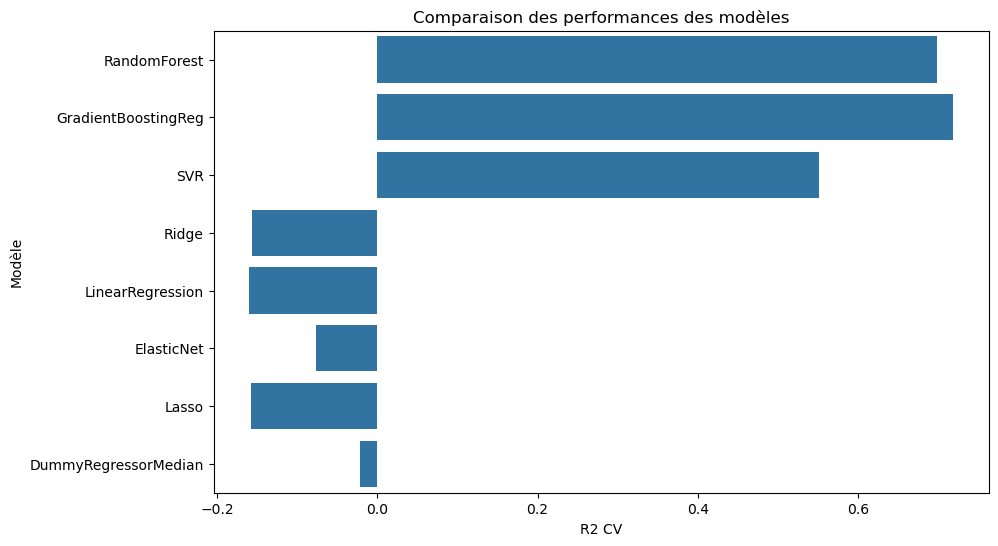

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x='R2 CV', y='Modèle', data=df_sorted_by_performance)
plt.title('Comparaison des performances des modèles')
plt.show()

GradientBoostingReg performe mieux, indiquant une meilleure généralisation lorsque le modèle est appliqué à de nouveaux ensembles de données pendant la validation croisée, de plus sa performance est plus consistante à travers les différents plis de la validation croisée.

## Importance des features

In [28]:
# Création du modèle Gradient Boosting
gb_model = GradientBoostingRegressor()

# Entraînement du modèle sur les données d'entraînement
gb_model.fit(X_train_final, y_train)

# Prédiction sur le jeu de test
y_pred_gb = gb_model.predict(X_test_final)

# Calcul des métriques pour le meilleur modèle
rmse_base = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_base = r2_score(y_test, y_pred_gb)
mae_base = mean_absolute_error(y_test, y_pred_gb)

print("RMSE :", rmse_base)
print("R² :", r2_base)
print("MAE :", mae_base)

RMSE : 0.6150167636243853
R² : 0.7612160754668045
MAE : 0.4695234077103081


In [29]:
importances_gb = gb_model.feature_importances_

# Création d'un DataFrame pour afficher l'importance des variables
features_gb = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances_gb})
features_gb = features_gb.sort_values(by='Importance', ascending=False)

print(features_gb)

                                       Feature  Importance
16       GroupedLargType_A - Data Center Sante    0.730531
11                 BuildingType_NonResidential    0.076607
21     GroupedLargType_F - Bureaux et services    0.061884
7                                  BuildingAge    0.032120
9                              Electricity_pct    0.020319
19              GroupedLargType_D - Résidences    0.019801
17      GroupedLargType_B - Public et culturel    0.010022
15              GroupedNeighborhood_urban_core    0.009184
12             BuildingType_Nonresidential COS    0.007369
18  GroupedLargType_C - Commerce resto loisirs    0.005868
4                LargestPropertyUseTypeGFA_pct    0.005613
14   GroupedNeighborhood_commercial_industrial    0.003658
13              BuildingType_SPS-District K-12    0.003366
2                     NumberOfPropertyUseTypes    0.002944
10                         BuildingType_Campus    0.002553
1                               NumberofFloors    0.0022

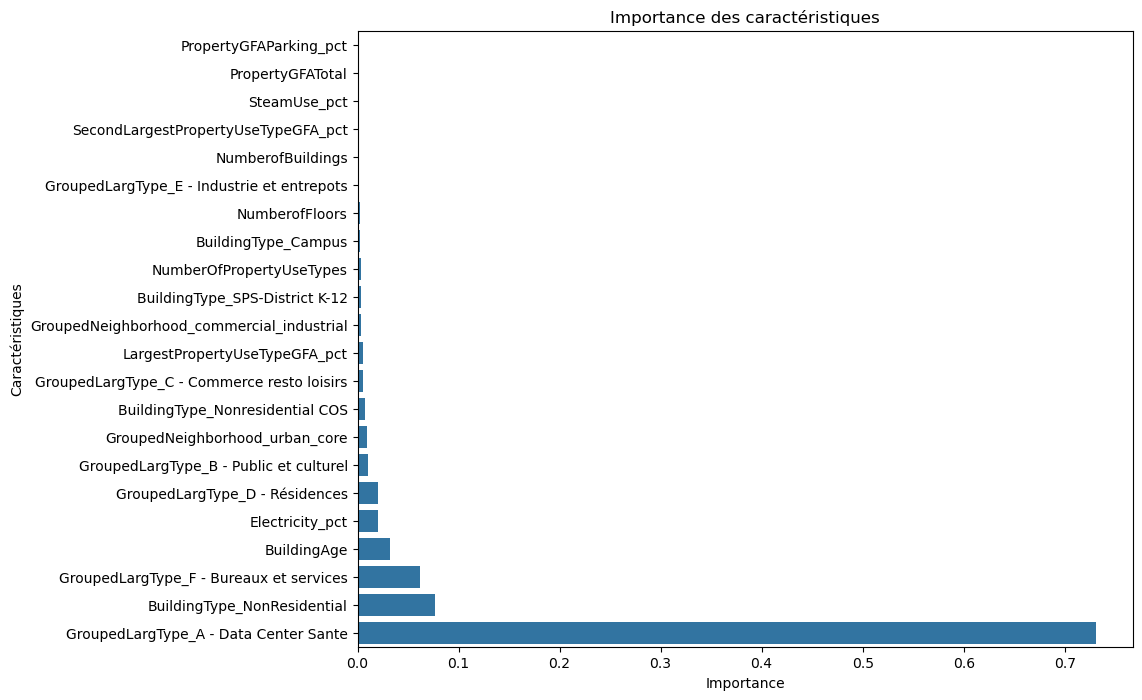

In [30]:
# Tri des caractéristiques par importance croissante
features_gb = features_gb.sort_values('Importance', ascending=True)

plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=features_gb)
plt.title('Importance des caractéristiques')
plt.xlabel('Importance')
plt.ylabel('Caractéristiques')
plt.show()


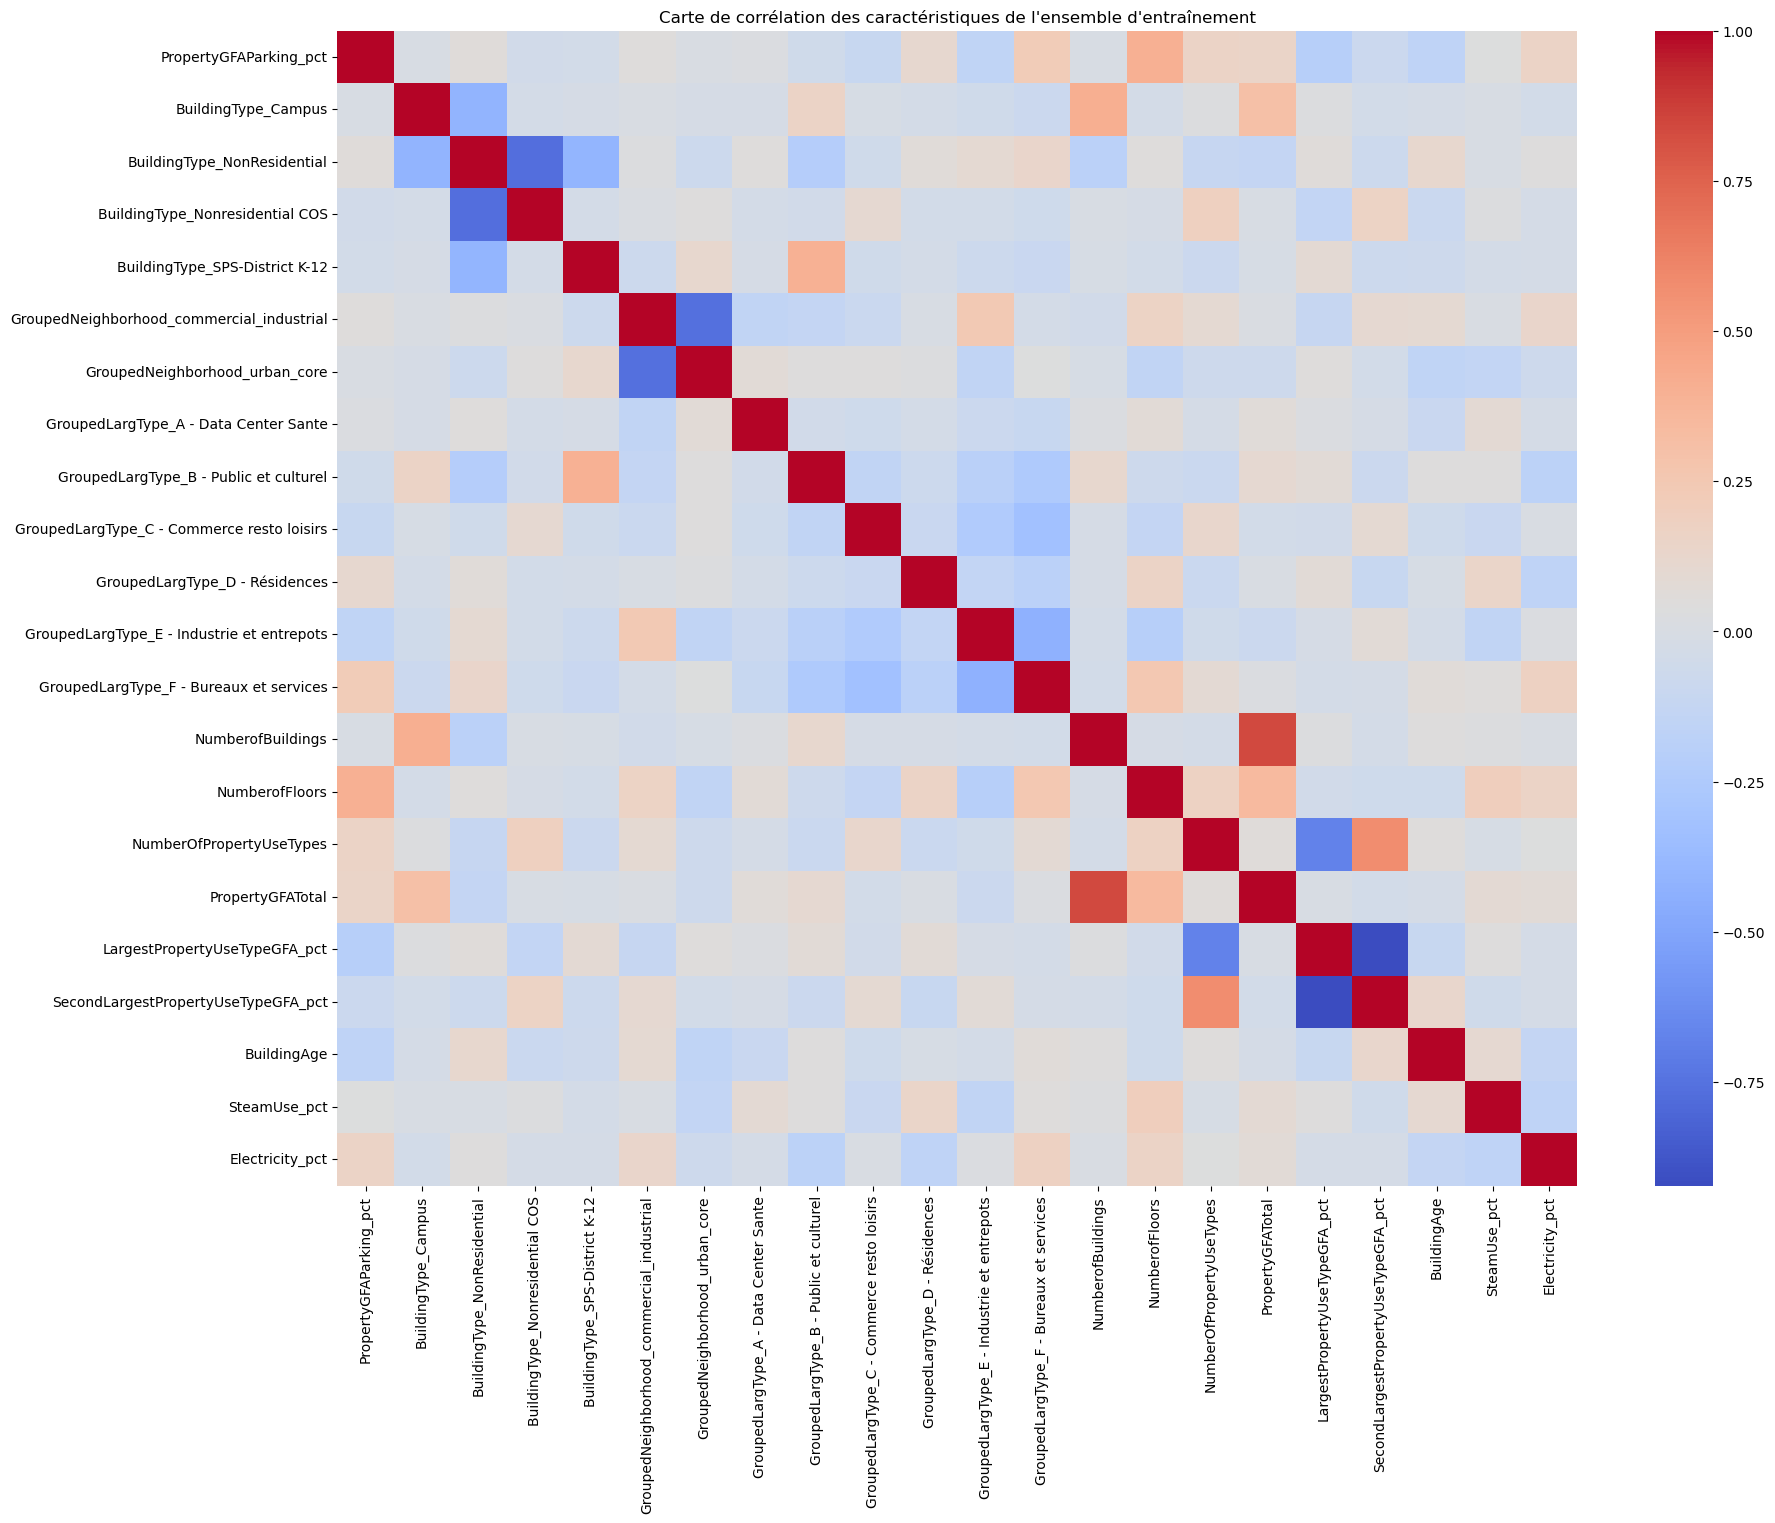

In [31]:
# Calcul de la matrice de corrélation pour l'ensemble d'entraînement préparé
corr_matrix = X_train_final.corr()

# Génération de la heatmap
plt.figure(figsize=(20, 15))  # Ajustez la taille selon le nombre de caractéristiques
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Carte de corrélation des caractéristiques de l\'ensemble d\'entraînement')
plt.show()


## Recherche des hyperparamètres

In [32]:
# Définition des hyperparamètres à tester
param_dist = {
    'n_estimators': np.arange(50, 500, 10),
    'learning_rate': np.linspace(0.008, 0.2, 20),
    'max_depth': np.arange(2, 10, 1),
    'min_samples_split': np.arange(2, 10, 1),
    'min_samples_leaf': np.arange(1, 5, 1),
    'subsample': np.linspace(0.3, 0.9, 20)
}

# Initialisation de la recherche aléatoire
random_search = RandomizedSearchCV(GradientBoostingRegressor(), param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Exécution de la recherche aléatoire sur le jeu d'entraînement
random_search.fit(X_train_final, y_train)

# Récupération du meilleur modèle
best_gb_model = random_search.best_estimator_

# Affichage des meilleurs hyperparamètres
print(random_search.best_params_)

{'subsample': 0.868421052631579, 'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_depth': 3, 'learning_rate': 0.06863157894736843}


In [33]:
# Définition de la grille d'hyperparamètres
param_grid = {
    'learning_rate': [0.025, 0.035, 0.045],
    'max_depth': [2, 3, 4],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [7, 8, 9],
    'n_estimators': [360, 380, 400],
    'subsample': [0.4, 0.6, 0.8]
}

# Configuration de GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Exécution de la recherche d'hyperparamètres
grid_search.fit(X_train_final, y_train)

# Affichage des meilleurs paramètres
print("Meilleurs paramètres :", grid_search.best_params_)

# Prédiction avec le meilleur modèle
y_pred = grid_search.best_estimator_.predict(X_test_final)

# Calcul des métriques pour le meilleur modèle
rmse_hp = np.sqrt(mean_squared_error(y_test, y_pred))
r2_hp = r2_score(y_test, y_pred)
mae_hp = mean_absolute_error(y_test, y_pred)

print("RMSE :", rmse_hp)
print("R² :", r2_hp)
print("MAE :", mae_hp)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Meilleurs paramètres : {'learning_rate': 0.035, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 360, 'subsample': 0.8}
RMSE : 0.605015498743962
R² : 0.7689190315786179
MAE : 0.462338462596298


In [34]:
# Meilleurs hyperparamètres obtenus de GridSearchCV
best_params = grid_search.best_params_

# Configuration du modèle avec les meilleurs hyperparamètres
best_gb_model = GradientBoostingRegressor(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    subsample=best_params['subsample'],
    random_state=0
)

# Métriques à évaluer lors de la validation croisée
scoring_metrics = ['neg_mean_squared_error', 'r2', 'neg_mean_absolute_error']

# Exécution de la validation croisée (5 plis)
cv_results = cross_validate(best_gb_model, X_train_final, y_train, cv=5, scoring=scoring_metrics, return_train_score=True)

# Calcul et affichage des métriques moyennes pour chaque pli
rmse_scores = np.sqrt(-cv_results['test_neg_mean_squared_error'])
r2_scores = cv_results['test_r2']
mae_scores = -cv_results['test_neg_mean_absolute_error']

# Affichage avec écart type
print(f"Validation Croisée RMSE: {rmse_scores.mean():.4f} (± {rmse_scores.std():.4f})")
print(f"Validation Croisée R²: {r2_scores.mean():.4f} (± {r2_scores.std():.4f})")
print(f"Validation Croisée MAE: {mae_scores.mean():.4f} (± {mae_scores.std():.4f})")


Validation Croisée RMSE: 0.6789 (± 0.0340)
Validation Croisée R²: 0.7232 (± 0.0166)
Validation Croisée MAE: 0.5213 (± 0.0293)


In [35]:
best_gb_model.fit(X_train_final, y_train) 

# Prédictions sur l'ensemble d'entraînement
y_train_pred = best_gb_model.predict(X_train_final)

# Prédictions sur l'ensemble de test
y_test_pred = best_gb_model.predict(X_test_final)

# Calcul des métriques pour l'ensemble d'entraînement
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

# Calcul des métriques pour l'ensemble de test
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Affichage des métriques
print("Ensemble d'entraînement : RMSE = {:.4f}, R² = {:.4f}, MAE = {:.4f}".format(train_rmse, train_r2, train_mae))
print("Ensemble de test : RMSE = {:.4f}, R² = {:.4f}, MAE = {:.4f}".format(test_rmse, test_r2, test_mae))


Ensemble d'entraînement : RMSE = 0.4892, R² = 0.8581, MAE = 0.3775
Ensemble de test : RMSE = 0.5974, R² = 0.7747, MAE = 0.4563


## Evaluation de la performance

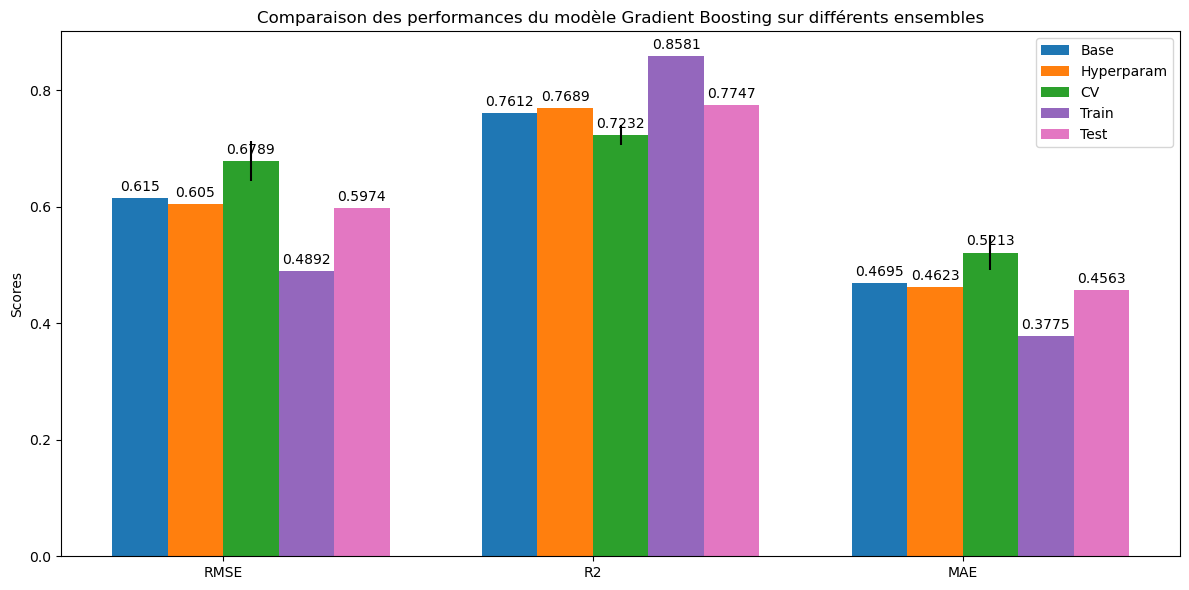

In [37]:
# Données pour le graphique
metrics = ['RMSE', 'R2', 'MAE']
base_performance = [rmse_base, r2_base, mae_base]
hp_performance = [rmse_hp, r2_hp, mae_hp]
cv_performance = [rmse_scores.mean(), r2_scores.mean(), mae_scores.mean()]
cv_std = [rmse_scores.std(), r2_scores.std(), mae_scores.std()]
train_performance = [train_rmse, train_r2, train_mae]
test_performance = [test_rmse, test_r2, test_mae]

# Configuration de l'axe x pour les groupes de barres
x = np.arange(len(metrics))  # emplacements des labels
width = 0.15 

# Couleurs de la palette tab10
colors_tab10 = plt.cm.tab10(np.arange(10))

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - (1.5 * width), base_performance, width, label='Base', color=colors_tab10[0])
rects2 = ax.bar(x - width/2, hp_performance, width, label='Hyperparam', color=colors_tab10[1])
rects3 = ax.bar(x + width/2, cv_performance, width, label='CV', yerr=cv_std, color=colors_tab10[2])
rects4 = ax.bar(x + (1.5 * width), train_performance, width, label='Train', color=colors_tab10[4])
rects5 = ax.bar(x + (2.5 * width), test_performance, width, label='Test', color=colors_tab10[6])

# Ajout des labels, titre et légende
ax.set_ylabel('Scores')
ax.set_title('Comparaison des performances du modèle Gradient Boosting sur différents ensembles')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Fonction pour attacher les labels aux barres
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # décalage vertical des labels
                    textcoords="offset points",
                    ha='center', va='bottom')

# Attacher les labels
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

# Afficher le graphique
plt.tight_layout()
plt.show()


## Analyse des erreurs

### Avec les cibles en log

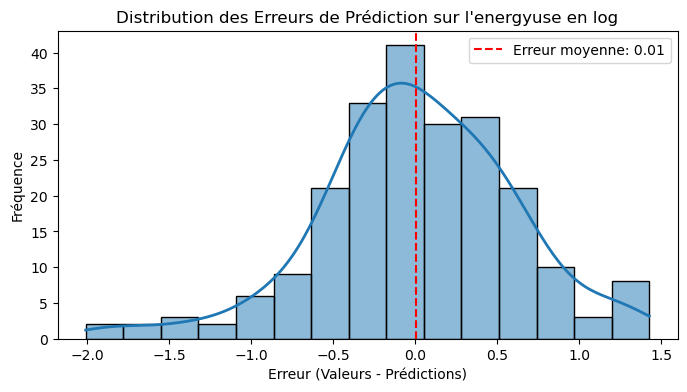

In [88]:
# Calcul des erreurs
errors = y_test - y_test_pred

# Calcul de l'erreur moyenne
mean_error = np.mean(errors)

# Visualisation de la distribution des erreurs
plt.figure(figsize=(8, 4))
sns.histplot(errors, kde=True, color=colors_tab10[0], line_kws={'color': colors_tab10[1], 'linewidth': 2})
plt.axvline(mean_error, color='red', linestyle='--', label=f'Erreur moyenne: {mean_error:.2f}')
plt.title('Distribution des Erreurs de Prédiction sur l\'energyuse en log')
plt.xlabel('Erreur (Valeurs - Prédictions)')
plt.ylabel('Fréquence')
plt.legend()

plt.show()

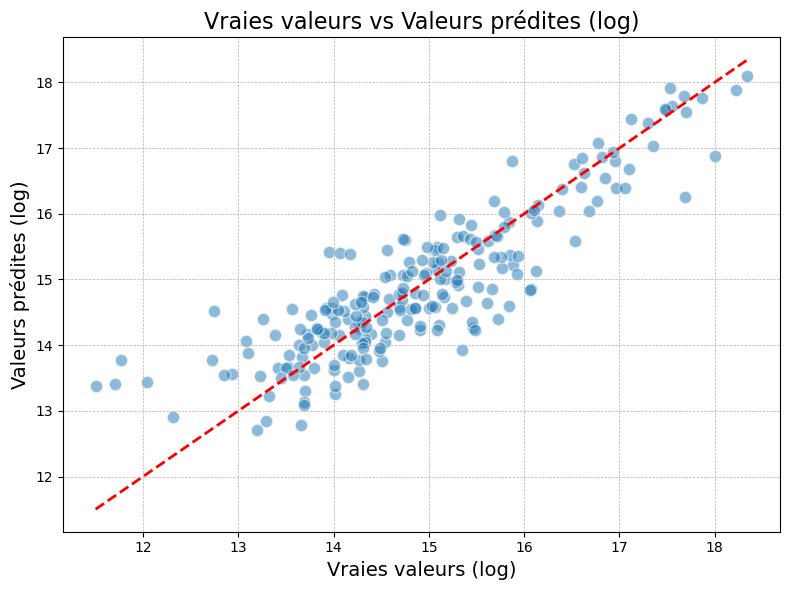

In [90]:
plt.figure(figsize=(8, 6))  # Augmenter la taille du graphique
plt.scatter(y_test, y_test_pred, alpha=0.5, edgecolors='w', s=80)  # Ajouter des bords blancs pour mieux distinguer les points superposés
plt.title('Vraies valeurs vs Valeurs prédites (log)', fontsize=16)
plt.xlabel('Vraies valeurs (log)', fontsize=14)
plt.ylabel('Valeurs prédites (log)', fontsize=14)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, linestyle='--')  # Ligne y=x
plt.grid(True, which='major', linestyle='--', linewidth=0.5)  # Grille plus fine
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.7)  # Grille mineure
plt.tight_layout()  # Ajuste automatiquement les sous-graphiques pour bien remplir la figure
plt.show()


### Avec les valeurs réelles

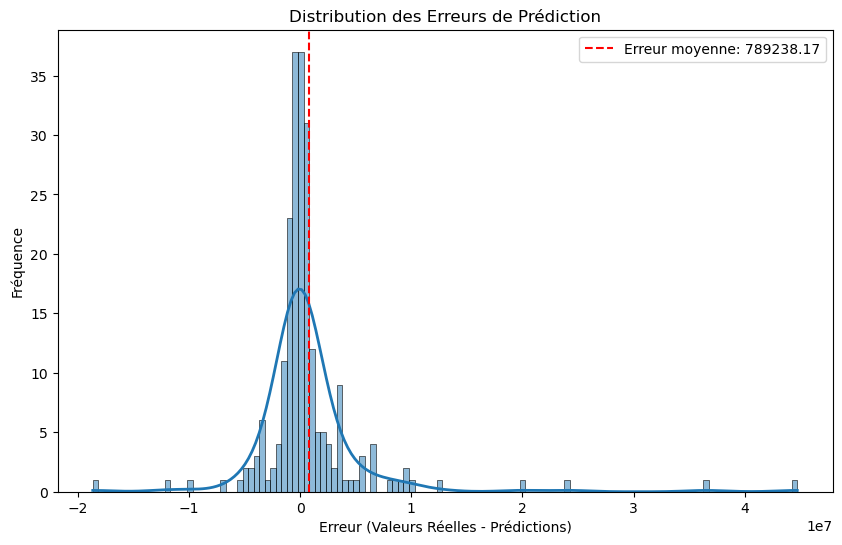

In [73]:
# Conversion des prédictions et des valeurs réelles de test de log à l'échelle originale
y_test_pred_original = np.exp(y_test_pred) 
y_test_original = np.exp(y_test)  

# Calcul des erreurs
errors = y_test_original - y_test_pred_original

# Calcul de l'erreur moyenne
mean_error = np.mean(errors)

# Visualisation de la distribution des erreurs
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, color=colors_tab10[0], binwidth=500000, line_kws={'color': colors_tab10[1], 'linewidth': 2})
plt.axvline(mean_error, color='red', linestyle='--', label=f'Erreur moyenne: {mean_error:.2f}')
plt.title('Distribution des Erreurs de Prédiction')
plt.xlabel('Erreur (Valeurs Réelles - Prédictions)')
plt.ylabel('Fréquence')
plt.legend()

plt.show()

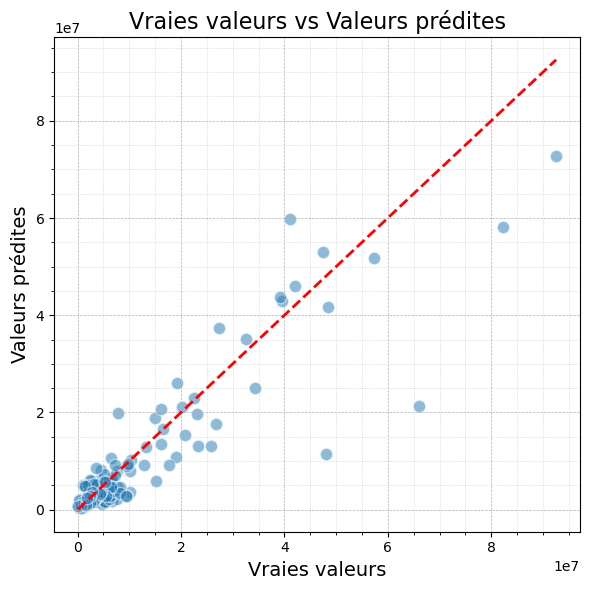

In [94]:
plt.figure(figsize=(6, 6)) 
plt.scatter(y_test_original, y_test_pred_original, alpha=0.5, edgecolors='w', s=80)  
plt.title('Vraies valeurs vs Valeurs prédites', fontsize=16)
plt.xlabel('Vraies valeurs', fontsize=14)
plt.ylabel('Valeurs prédites', fontsize=14)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red', lw=2, linestyle='--')  # Ligne y=x
plt.grid(True, which='major', linestyle='--', linewidth=0.5) 
plt.minorticks_on() 
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.7) 
plt.tight_layout() 
plt.show()


In [101]:
# Création d'un DataFrame avec les valeurs réelles et prédites
df_errors = pd.DataFrame({'Valeurs réelles': y_test, 'Valeurs prédites': y_test_pred})


# Calcul des erreurs absolues et ajout en tant que nouvelle colonne
df_errors['Erreurs absolues'] = abs(df_errors['Valeurs réelles'] - df_errors['Valeurs prédites'])

# Trier le DataFrame par les erreurs absolues de façon décroissante
df_errors_sorted = df_errors.sort_values('Erreurs absolues', ascending=False)

# Afficher les 15 erreurs les plus grandes
print(df_errors_sorted.head(15))

plus_gd_erreurs = df_errors_sorted['Valeurs réelles'].head(15).tolist()
df_top_errors = df[df['Log_SiteEnergyUseWN'].isin(plus_gd_erreurs)]
df_top_errors

      Valeurs réelles  Valeurs prédites  Erreurs absolues
693         11.771181         13.780669          2.009488
668         11.501489         13.375667          1.874178
934         12.744600         14.519462          1.774862
864         11.700322         13.407451          1.707129
451         13.953316         15.422414          1.469098
199         17.687482         16.259603          1.427880
767         15.352172         13.926306          1.425865
572         12.040396         13.437819          1.397422
820         14.061477         15.401583          1.340106
1102        15.720052         14.403157          1.316895
318         15.480530         14.226164          1.254366
613         15.842094         14.597815          1.244279
964         16.061604         14.834251          1.227353
1076        14.166529         15.390013          1.223484
650         16.072946         14.852087          1.220859


,TotalGHGEmissions,SiteEnergyUseWN(kBtu),Log_TotalGHGEmissions,Log_SiteEnergyUseWN,NumberofBuildings,NumberofFloors,BuildingType,NumberOfPropertyUseTypes,PropertyGFATotal,LargestPropertyUseTypeGFA_pct,...,PropertyGFAParking_pct,BuildingAge,GroupedNeighborhood,GroupedLargType,GroupedSecondLargType,GroupedThirdLargType,SteamUse_pct,Electricity_pct,NaturalGas_pct,ENERGYSTARScore
199,349.07,4.803700e+07,5.855272,17.687482,1.0,8,NonResidential,4,287819,60.002308,...,0.000000,87,urban_core,F - Bureaux et services,A - Data Center Sante,G - Autres,0.0,100.245727,0.523578,NaN
318,178.62,5.285776e+06,5.185261,15.480530,1.0,2,NonResidential,1,61200,100.000000,...,0.000000,85,commercial_industrial,E - Industrie et entrepots,X - Non classifie,X - Non classifie,0.0,33.730181,59.201160,16.0
451,34.98,1.147752e+06,3.554776,13.953316,1.0,6,NonResidential,3,62334,69.505618,...,0.000000,10,residential,D - Résidences,F - Bureaux et services,X - Non classifie,0.0,41.922636,51.889683,100.0
572,1.12,1.694641e+05,0.113329,12.040396,1.0,1,NonResidential,1,36444,100.000000,...,0.000000,56,urban_core,E - Industrie et entrepots,X - Non classifie,X - Non classifie,0.0,95.188896,0.000000,80.0
613,92.45,7.588116e+06,4.526668,15.842094,1.0,2,NonResidential,2,43183,69.805920,...,0.000000,63,urban_core,F - Bureaux et services,A - Data Center Sante,X - Non classifie,0.0,85.974877,11.655964,NaN
650,208.53,9.558542e+06,5.340083,16.072946,1.0,1,NonResidential,1,29214,100.000000,...,0.000000,50,urban_core,C - Commerce resto loisirs,X - Non classifie,X - Non classifie,0.0,65.148858,32.525442,8.0
668,0.68,9.886290e+04,-0.385662,11.501489,1.0,3,NonResidential,1,30989,100.000000,...,0.000000,36,urban_core,E - Industrie et entrepots,X - Non classifie,X - Non classifie,0.0,98.813611,0.000000,NaN
693,0.86,1.294669e+05,-0.150823,11.771181,2.0,2,NonResidential,3,33344,96.957705,...,0.000000,39,urban_core,E - Industrie et entrepots,F - Bureaux et services,X - Non classifie,0.0,95.597409,0.000000,NaN
767,157.07,4.649041e+06,5.056692,15.352172,1.0,1,Nonresidential COS,2,23100,50.000000,...,0.000000,31,commercial_industrial,F - Bureaux et services,F - Bureaux et services,X - Non classifie,0.0,33.827277,59.174096,NaN
820,23.50,1.278856e+06,3.157000,14.061477,1.0,1,NonResidential,2,43794,77.722976,...,0.000000,41,commercial_industrial,C - Commerce resto loisirs,F - Bureaux et services,X - Non classifie,0.0,64.986506,26.074393,88.0


# Modélisation avec l'Energy Star Score

# Comparaison et conclusion